# Seaborn basics

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# convert to datime format
import pandas as pd

stock_prices = pd.read_csv("../data/stock_prices.csv")

# set index as datimetime
stock_prices["datetime"] = pd.to_datetime(stock_prices["date"])
stock_prices.set_index("datetime", inplace=True)

## Simple bar plot

In [5]:
selected_stocks = stock_prices[stock_prices["ticker"].isin(["AMZN", "DIS", "META"])]
selected_stocks.sample(10)

,Unnamed: 0,date,ticker,open,high,low,close,adjusted_close,volume,sector
datetime,,,,,,,,,,
2020-03-30,50637,2020-03-30,DIS,96.0000,100.460,92.100,99.800,99.018974,23119200,Consumer Services
2016-04-11,49638,2016-04-11,DIS,96.9300,97.640,96.200,96.270,90.114490,5916600,Consumer Services
2020-05-20,50673,2020-05-20,DIS,116.4200,120.870,116.040,119.920,118.981520,25749900,Consumer Services
2020-03-25,50634,2020-03-25,DIS,100.6600,105.920,95.510,100.730,99.941696,28533000,Consumer Services
2020-03-16,50627,2020-03-16,DIS,91.8000,98.280,90.000,95.010,94.266464,35379500,Consumer Services
2024-09-16,21774,2024-09-16,AMZN,185.2900,185.810,183.360,184.890,184.890000,26065500,Retail
2023-02-06,51356,2023-02-06,DIS,110.1700,110.430,108.530,109.870,109.010170,11956500,Consumer Services
2018-03-23,20144,2018-03-23,AMZN,76.9505,77.451,74.768,74.778,74.778000,160120000,Retail
2021-04-08,50895,2021-04-08,DIS,187.2000,188.050,185.630,187.320,185.854060,7763000,Consumer Services


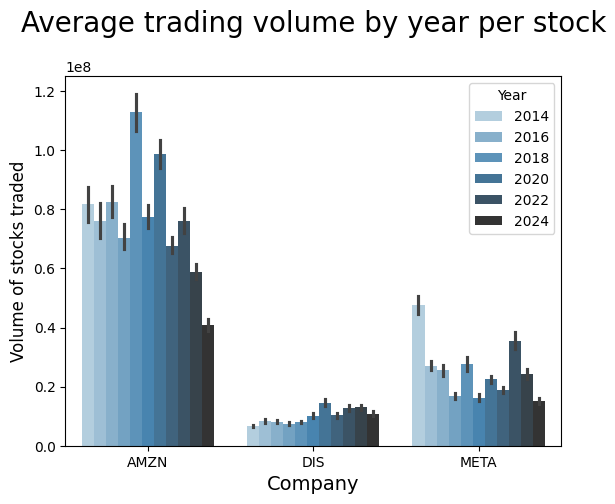

In [17]:
sns.barplot(selected_stocks, x="ticker", y="volume", hue=selected_stocks.index.year, palette="Blues_d")

plt.title("Average trading volume by year per stock", fontsize="20", pad=32)
plt.xlabel("Company", fontsize="14")
plt.ylabel("Volume of stocks traded", fontsize="12")
plt.legend(title="Year")

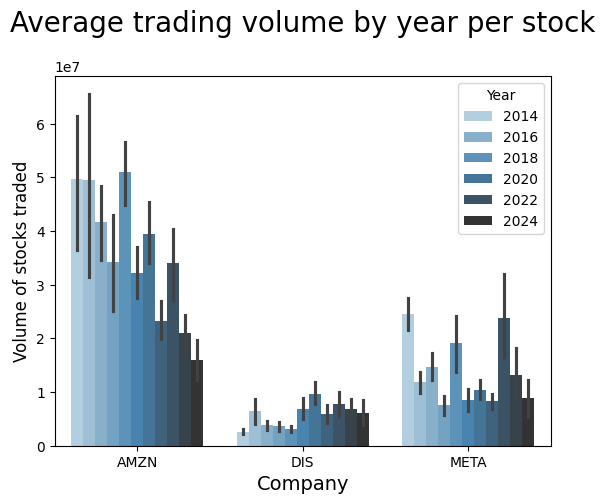

In [19]:
import numpy as np

# by default the estimator is the mean, but you can change it with the estimator parameter
# here we apply the standard deviation
sns.barplot(selected_stocks, x="ticker", y="volume", hue=selected_stocks.index.year, palette="Blues_d", estimator=np.std)

plt.title("Average trading volume by year per stock", fontsize="20", pad=32)
plt.xlabel("Company", fontsize="14")
plt.ylabel("Volume of stocks traded", fontsize="12")
plt.legend(title="Year")

## Subplots

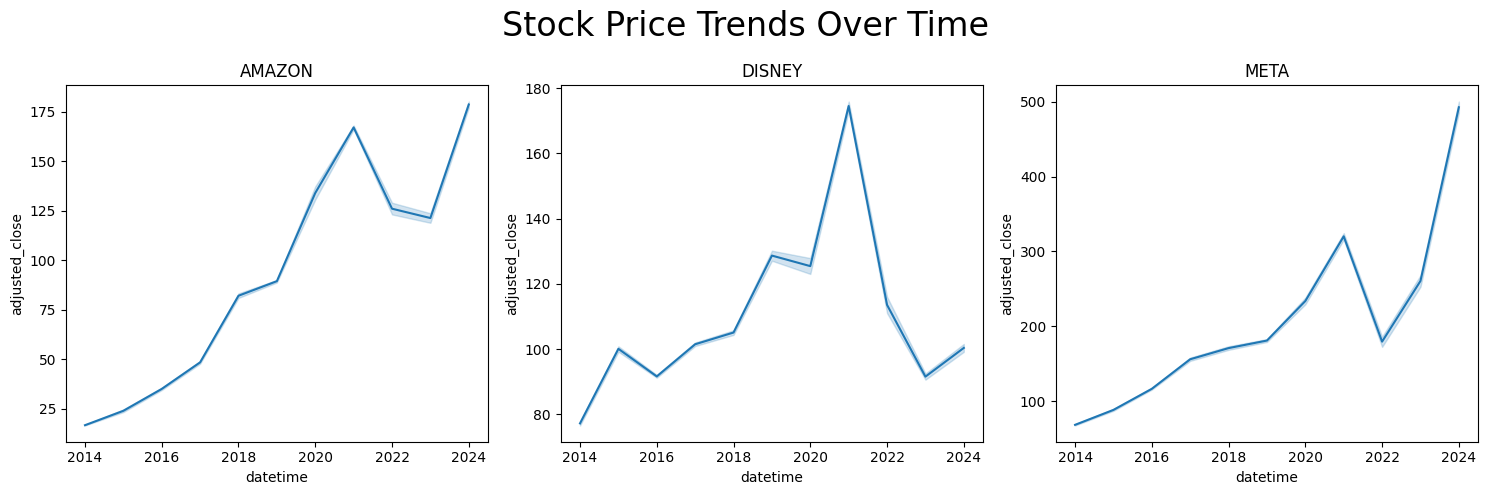

In [24]:
tickers = ["AMZN", "DIS", "META"]

# create a line plot for each one showing the adjusted close price over time

# create subplots - manually set the figure size
plt.figure(figsize=(15, 5)) # in inches, 5x5 is good for one plot

# a quicker way to plot all three graphs in a row
#for li in range(len(tickers)):
#    plt.subplot(1, 3, li+1) # you need to set +1 because the graph starts at 0
#    filtered_df = stock_prices[stock_prices["ticker"]==tickers[li]] 
#    sns.lineplot(filtered_df, x=filtered_df.index.year, y="adjusted_close")



plt.subplot(1, 3, 1) # three arguments: rows, cols, which plot you are creating
filtered_df = stock_prices[stock_prices["ticker"]==tickers[0]] # AMZN
sns.lineplot(filtered_df, x=filtered_df.index.year, y="adjusted_close")
plt.title("AMAZON")

plt.subplot(1, 3, 2) # three arguments: rows, cols, which plot you are creating
filtered_df = stock_prices[stock_prices["ticker"]==tickers[1]] # DIS
sns.lineplot(filtered_df, x=filtered_df.index.year, y="adjusted_close")
plt.title("DISNEY")

plt.subplot(1, 3, 3) # three arguments: rows, cols, which plot you are creating
filtered_df = stock_prices[stock_prices["ticker"]==tickers[2]] # META
sns.lineplot(filtered_df, x=filtered_df.index.year, y="adjusted_close")
plt.title("META")

# Add an overall title to the figure
plt.suptitle("Stock Price Trends Over Time", fontsize=24)

plt.tight_layout()
plt.show()


## Boxplots

Text(0, 0.5, 'Trading volume')

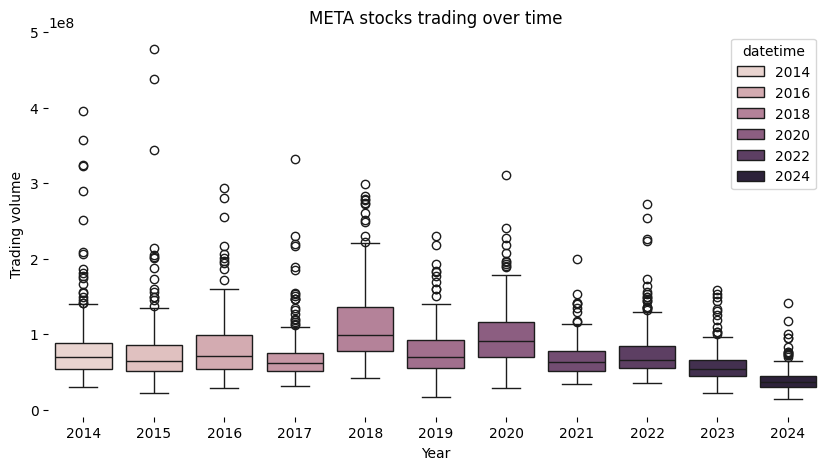

In [30]:
filtered_df = stock_prices[stock_prices["ticker"]=="AMZN"]

plt.figure(figsize=(10, 5))

# x gives you a vertical boxplot
# y gives you  a horizontal boxplot
sns.boxplot(filtered_df, y="volume", x=filtered_df.index.year, hue=filtered_df.index.year)

sns.despine(left=True, bottom=True) # remove some axis from the graph (true is to remove it)

plt.title("META stocks trading over time")
plt.xlabel("Year")
plt.ylabel("Trading volume")

## Histograms and rugplots

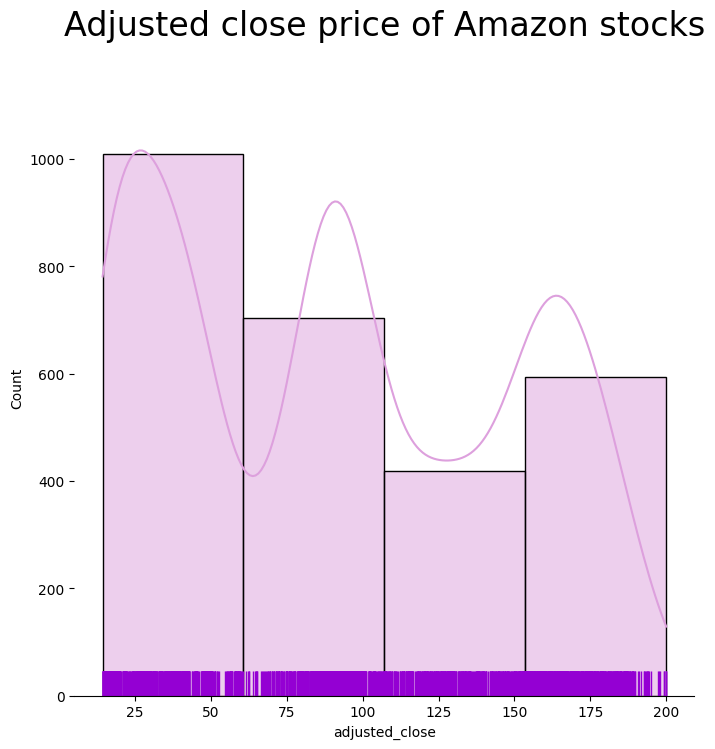

In [40]:
plt.figure(figsize=(8,8))

sns.histplot(filtered_df, x="adjusted_close", binwidth=50, kde=True, color="plum")
# you can set either binwidth (with a unit of dollars, in this case), or bins, for a number of bins
# kde = probability of density curve

plt.title("Adjusted close price of Amazon stocks", fontsize=24, pad=32)

sns.rugplot(filtered_df, x="adjusted_close", color="darkviolet", height=0.04)
# you can stock a rugplot, that shows individual values

sns.despine(left=True, top=True)
